In [5]:
import pandas as pd
import os

cart = 'scraped_data'
top5 = ['Serie-A', 'Bundeslig', 'Premier-League', 'La-Lig', 'Ligue-1']

df_top5 = pd.DataFrame()
for file in os.listdir(cart):
    if ('keeper' not in file) and (file.strip('.csv') in top5):
        print(file)
        temp = pd.read_csv(f'{cart}\\{file}')
        print(temp.shape)
        df_top5 = pd.concat([df_top5, temp], ignore_index = True)
df_top5.sample(10)

Bundeslig.csv
(507, 110)
La-Lig.csv
(609, 110)
Ligue-1.csv
(540, 110)
Premier-League.csv
(580, 110)
Serie-A.csv
(616, 110)


,player,nationality,position,team,age,games,minutes_90s,goals,assists,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
719,Andoni Gorosabel,es ESP,DF,Alavés,26,36.0,31.7,1.0,0.0,0.0,...,29.0,41.0,0.0,1.0,1.0,0.0,164.0,25.0,57.0,30.5
2726,Nicolò Rovella,it ITA,MF,Lazio,21,23.0,14.6,0.0,2.0,0.0,...,38.0,16.0,0.0,0.0,0.0,0.0,99.0,11.0,9.0,55.0
1864,Joe Gomez,eng ENG,DF,Liverpool,26,32.0,19.8,0.0,1.0,0.0,...,28.0,16.0,0.0,0.0,0.0,0.0,111.0,31.0,10.0,75.6
1004,Javier Rueda Garcia,es ESP,"MF,DF",Celta Vigo,21,1.0,0.2,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1467,Nuno Mendes,pt POR,DF,Paris S-G,21,6.0,3.0,1.0,1.0,0.0,...,6.0,1.0,0.0,0.0,0.0,0.0,14.0,6.0,2.0,75.0
1011,Salvi,es ESP,MF,Rayo Vallecano,32,1.0,0.3,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1460,Chancel Mbemba,cd COD,DF,Marseille,28,25.0,24.5,2.0,2.0,0.0,...,21.0,9.0,2.0,0.0,0.0,1.0,102.0,40.0,32.0,55.6
2651,Caleb Okoli,it ITA,DF,Frosinone,22,34.0,32.4,0.0,1.0,0.0,...,27.0,26.0,0.0,0.0,2.0,0.0,164.0,74.0,59.0,55.6
83,Timothy Chandler,us USA,"MF,DF",Eint Frankfurt,33,6.0,0.2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,66.7
1283,Jeremy Doku,be BEL,FW,Rennes,21,2.0,1.2,1.0,0.0,0.0,...,2.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0


In [9]:
df_top5[df_top5.player == 'Vitinha']

,player,nationality,position,team,age,games,minutes_90s,goals,assists,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
1635,Vitinha,pt POR,FW,Marseille,23,18.0,10.3,3.0,2.0,0.0,...,16.0,24.0,6.0,0.0,0.0,0.0,35.0,12.0,29.0,29.3
1636,Vitinha,pt POR,MF,Paris S-G,23,28.0,23.6,7.0,4.0,0.0,...,17.0,16.0,1.0,0.0,0.0,0.0,154.0,4.0,10.0,28.6
2816,Vitinha,pt POR,"FW,MF",Genoa,23,9.0,3.2,2.0,0.0,0.0,...,10.0,8.0,2.0,0.0,0.0,0.0,13.0,7.0,16.0,30.4


This is funny because there are two Vitinha here: the forward playing in Marseille and Genoa is Vitor Oliveira, while the midfielder playing in PSG is Vitor Machado Ferreira. We can't really differentiate them from their position as Vitor Oliveira played as a different role in Genoa, so we'll have to modify their names.

In [10]:
df_top5.loc[1636, 'player'] = 'Vitinha Ferreira'
df_top5.loc[[1635,2816], 'player'] = 'Vitinha Oliveira'
df_top5.loc[[1635,1636,2816],:]

,player,nationality,position,team,age,games,minutes_90s,goals,assists,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
1635,Vitinha Oliveira,pt POR,FW,Marseille,23,18.0,10.3,3.0,2.0,0.0,...,16.0,24.0,6.0,0.0,0.0,0.0,35.0,12.0,29.0,29.3
1636,Vitinha Ferreira,pt POR,MF,Paris S-G,23,28.0,23.6,7.0,4.0,0.0,...,17.0,16.0,1.0,0.0,0.0,0.0,154.0,4.0,10.0,28.6
2816,Vitinha Oliveira,pt POR,"FW,MF",Genoa,23,9.0,3.2,2.0,0.0,0.0,...,10.0,8.0,2.0,0.0,0.0,0.0,13.0,7.0,16.0,30.4


In [23]:
double_vals = df_top5.player.value_counts()
dup = double_vals[double_vals > 1].index
dups = df_top5.loc[df_top5.player.isin(dup), :]
dups.groupby(['player', 'nationality']).filter(lambda x: x['age'].nunique() > 1)

,player,nationality,position,team,age,games,minutes_90s,goals,assists,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
875,Stefan Mitrović,rs SRB,DF,Getafe,33,11.0,7.8,1.0,0.0,0.0,...,13.0,2.0,0.0,0.0,1.0,0.0,27.0,11.0,20.0,35.5
990,Rodri,es ESP,"FW,MF",Betis,23,29.0,11.7,0.0,0.0,0.0,...,6.0,29.0,4.0,0.0,0.0,0.0,58.0,0.0,9.0,0.0
1441,Marquinhos,br BRA,"FW,MF",Nantes,20,7.0,1.7,0.0,0.0,0.0,...,7.0,6.0,1.0,1.0,0.0,0.0,14.0,2.0,5.0,28.6
1442,Marquinhos,br BRA,DF,Paris S-G,29,21.0,17.1,0.0,1.0,0.0,...,3.0,3.0,2.0,0.0,0.0,0.0,96.0,24.0,22.0,52.2
1783,Danilo,br BRA,MF,Nott'ham Forest,22,29.0,19.9,2.0,2.0,0.0,...,13.0,9.0,2.0,0.0,1.0,0.0,118.0,14.0,10.0,58.3
2115,Rodri,es ESP,MF,Manchester City,27,34.0,32.6,8.0,9.0,0.0,...,41.0,35.0,6.0,1.0,0.0,0.0,235.0,54.0,22.0,71.1
2386,Danilo,br BRA,DF,Juventus,32,29.0,27.2,1.0,1.0,0.0,...,26.0,14.0,1.0,0.0,0.0,0.0,142.0,37.0,27.0,57.8
2620,Stefan Mitrović,rs SRB,"FW,MF",Hellas Verona,20,10.0,4.3,0.0,0.0,0.0,...,10.0,6.0,1.0,0.0,0.0,0.0,16.0,4.0,18.0,18.2


Since we will use a combination of name + country + age to identify players, we will only change the names of players who share name and nationality

In [37]:
import matplotlib.pyplot as plt

def stampa_scatter(x: str, y:str, df = df_top5, labels: bool = True, save: bool = False):
    import numpy as np
    
    colors = np.random.rand(len(df))
    
    xmin = df[x].min() 
    xmax = df[x].max() 
    ymin = df[y].min() 
    ymax = df[y].max() 
    xmed = df[x].mean()
    ymed = df[y].mean()

    xquant = df[x].quantile(0.9)
    yquant = df[y].quantile(0.9)
    
    name = 'Distribution of '+ x + ' and ' + y
    
    plt.figure(figsize=(10, 7))
    plt.title(name)
    plt.scatter(df[x], df[y], c = colors, alpha = 0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.hlines(y = ymed, xmin = xmin, xmax = xmax, linestyle = '--', color = 'grey')
    plt.vlines(x = xmed, ymin = ymin, ymax = ymax, linestyle = '--', color = 'grey')

    if labels == True:
        for point in range(0, len(df)):
            xp = df.loc[point, x]
            yp = df.loc[point, y]

            txt = df.loc[point, 'player']
            if (xp >= 15) or (yp >= 7):
                plt.annotate(txt, xy = (xp, yp))
    
    if save == True:
        plt.savefig(name + '.png')
    plt.show()

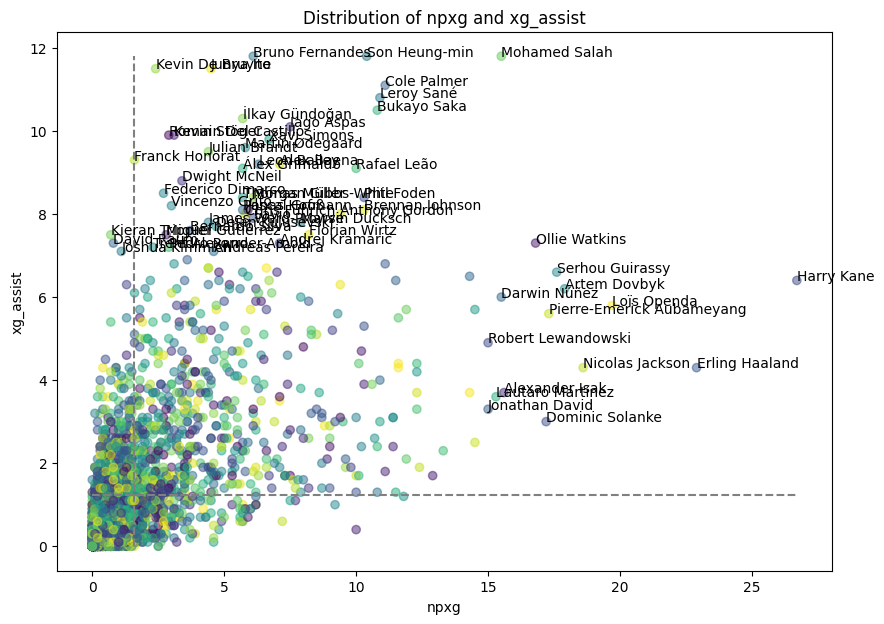

In [38]:
stampa_scatter('npxg', 'xg_assist')

In [39]:
df_top5.position.value_counts()

position
DF       848
MF       569
FW       403
FW,MF    319
MF,FW    245
GK       203
DF,MF    108
MF,DF     81
DF,FW     47
FW,DF     29
Name: count, dtype: int64

FW,MF -> ala offensiva 
FW,DF -> ala / esterno di centrocampo 
DF,FW -> terzino / esterno di centrocampo 
MF,FW -> trequartista 
MF,DF -> mediano
DF,MF -> braccetto difesa a 3

In [57]:
MF = ['MF', 'FW,DF', 'MF,FW', 'MF,DF']
DF = ['DF', 'DF,FW', 'DF,MF']
FW = ['FW', 'FW,MF']

In [58]:
top5_mfs = df_top5[df_top5.position.isin(MF)]
top5_dfs = df_top5[df_top5.position.isin(DF)]
top5_fws = df_top5[df_top5.position.isin(FW)]

len(top5_mfs), len(top5_dfs), len(top5_fws)

(924, 1003, 722)

In [59]:
top5_mfs.to_csv('data\\top5_midfield.csv', index = False)
top5_dfs.to_csv('data\\top5_defenders.csv', index = False)
top5_fws.to_csv('data\\top5_forwards.csv', index = False)

In [60]:
df_other = pd.DataFrame()
for file in os.listdir(cart):
    if ('keeper' not in file) and (file.strip('.csv') not in top5) and ('.csv' in file):
        print(file)
        temp = pd.read_csv(f'{cart}\\{file}')
        print(temp.shape)
        df_other = pd.concat([df_other, temp], ignore_index = True)
df_other.sample(10)

Belgian-Pro-League.csv
(479, 110)
Championship.csv
(735, 110)
Eredivisie.csv
(525, 110)
Primeira-Lig.csv
(536, 110)
Serie-B.csv
(625, 110)


,player,nationality,position,team,age,games,minutes_90s,goals,assists,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
141,Renaud Emond,be BEL,FW,Standard Liège,31,3.0,1.1,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,3.0,9.0,6.0,60.0
312,Denis Odoi,gh GHA,"DF,MF",Club Brugge,35,17.0,6.4,1.0,0.0,0.0,...,11.0,12.0,0.0,0.0,0.0,0.0,32.0,10.0,8.0,55.6
1,Shuto Abe,jp JPN,MF,RWD Molenbeek,25,28.0,16.4,1.0,1.0,0.0,...,32.0,16.0,1.0,0.0,1.0,0.0,97.0,10.0,17.0,37.0
2880,Federico Viviani,it ITA,"MF,FW",Ternana,31,5.0,1.1,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,50.0
2331,Leonardo Benedetti,it ITA,MF,Sampdoria,23,14.0,6.1,1.0,0.0,0.0,...,8.0,9.0,0.0,0.0,0.0,0.0,27.0,10.0,12.0,45.5
1054,Jack Rudoni,eng ENG,"MF,FW",Huddersfield,23,35.0,34.0,5.0,3.0,0.0,...,45.0,47.0,6.0,0.0,0.0,0.0,243.0,62.0,67.0,48.1
2165,Igor Rossi Branco,br BRA,DF,Farense,34,13.0,11.3,0.0,0.0,0.0,...,16.0,12.0,1.0,0.0,0.0,0.0,22.0,40.0,21.0,65.6
2881,Mattia Viviani,it ITA,MF,Cosenza,22,15.0,5.0,0.0,0.0,0.0,...,21.0,6.0,0.0,0.0,1.0,0.0,28.0,2.0,8.0,20.0
2867,Davide Veroli,it ITA,DF,Catanzaro,20,28.0,23.4,0.0,1.0,0.0,...,21.0,22.0,1.0,0.0,0.0,0.0,85.0,23.0,30.0,43.4
556,Josh Bowler,eng ENG,"FW,MF",Cardiff City,24,38.0,26.4,5.0,2.0,0.0,...,15.0,56.0,1.0,0.0,0.0,0.0,120.0,12.0,15.0,44.4


In [64]:
double_vals = df_other.player.value_counts()
dup = double_vals[double_vals > 1].index
dups = df_other.loc[df_other.player.isin(dup), :]
dups.groupby(['player', 'nationality']).filter(lambda x: x['age'].nunique() > 1).sort_values('player')

,player,nationality,position,team,age,games,minutes_90s,goals,assists,pens_att,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
811,Cameron Humphreys,eng ENG,DF,Rotherham Utd,24,25.0,22.5,0.0,1.0,0.0,...,12.0,3.0,0.0,0.0,1.0,0.0,96.0,35.0,24.0,59.3
812,Cameron Humphreys,eng ENG,DF,Ipswich Town,19,3.0,1.1,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,2.0,66.7
599,Chiquinho,pt POR,FW,Stoke City,23,3.0,0.7,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,5.0,1.0,3.0,25.0
1837,Chiquinho,pt POR,"FW,MF",Famalicão,23,27.0,19.3,5.0,2.0,0.0,...,51.0,72.0,9.0,3.0,0.0,0.0,68.0,12.0,25.0,32.4
1838,Chiquinho,pt POR,MF,Benfica,28,9.0,2.1,0.0,0.0,0.0,...,4.0,5.0,0.0,0.0,0.0,0.0,14.0,3.0,3.0,50.0
2132,Diogo Pinto,pt POR,MF,Casa Pia,24,1.0,0.1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2133,Diogo Pinto,pt POR,GK,Sporting CP,19,2.0,1.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
2062,João Moutinho,pt POR,MF,Braga,36,30.0,23.5,1.0,1.0,1.0,...,32.0,32.0,0.0,0.0,0.0,0.0,171.0,25.0,19.0,56.8
2693,João Moutinho,pt POR,DF,Spezia,25,5.0,1.9,0.0,0.0,0.0,...,2.0,2.0,0.0,0.0,0.0,1.0,11.0,0.0,3.0,0.0
2181,Nuno Santos,pt POR,"FW,MF",Vitória,24,27.0,10.7,2.0,4.0,0.0,...,18.0,11.0,1.0,0.0,0.0,0.0,55.0,4.0,5.0,44.4


In [66]:
other_mfs = df_other[df_other.position.isin(MF)]
other_dfs = df_other[df_other.position.isin(DF)]
other_fws = df_other[df_other.position.isin(FW)]

len(other_mfs), len(other_dfs), len(other_fws)

(909, 999, 783)

In [67]:
other_mfs.to_csv('data\\other_midfield.csv', index = False)
other_dfs.to_csv('data\\other_defenders.csv', index = False)
other_fws.to_csv('data\\other_forwards.csv', index = False)

In [69]:
keep_top5 = pd.DataFrame()
for file in os.listdir(cart):
    if ('keepers' in file) and (file.strip('keepers_').strip('.csv') in top5):
        print(file)
        temp = pd.read_csv(f'{cart}\\{file}')
        print(temp.shape)
        keep_top5 = pd.concat([keep_top5, temp], ignore_index = True)
keep_top5.sample(10)

keepers_Bundeslig.csv
(33, 36)
keepers_La-Lig.csv
(46, 36)
keepers_Ligue-1.csv
(33, 36)
keepers_Premier-League.csv
(40, 36)
keepers_Serie-A.csv
(51, 36)


,player,nationality,position,team,age,gk_games,minutes_90s,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against,...,gk_passes_throws,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions
104,Massamba Ndiaye,sn SEN,GK,Clermont Foot,21,4.0,4.0,6.0,1.50,24.0,...,28.0,29.7,30.9,24.0,45.8,35.1,7.0,9.3,0.75,10.1
83,Marcin Bułka,pl POL,GK,Nice,23,34.0,34.0,29.0,0.85,105.0,...,158.0,14.4,23.9,147.0,22.4,25.5,32.0,8.5,0.62,12.2
172,Christos Mandas,gr GRE,GK,Lazio,21,9.0,8.0,6.0,0.75,29.0,...,29.0,42.5,37.7,29.0,41.4,37.9,6.0,6.1,0.62,13.1
163,Alessio Cragno,it ITA,GK,Sassuolo,29,3.0,3.0,7.0,2.33,14.0,...,11.0,50.0,37.8,22.0,27.3,30.5,3.0,8.1,2.67,18.6
78,Iván Villar,es ESP,GK,Celta Vigo,26,12.0,11.3,18.0,1.60,44.0,...,48.0,35.4,34.4,98.0,60.2,45.7,5.0,3.7,0.80,13.2
25,Frederik Rønnow,dk DEN,GK,Union Berlin,30,33.0,33.0,56.0,1.70,162.0,...,174.0,35.2,33.6,218.0,63.8,47.4,54.0,10.0,1.12,12.9
94,Alban Lafont,fr FRA,GK,Nantes,24,28.0,27.7,43.0,1.55,118.0,...,145.0,34.2,34.0,166.0,60.8,46.9,33.0,8.6,1.19,13.0
2,Oliver Baumann,de GER,GK,Hoffenheim,33,34.0,34.0,66.0,1.94,211.0,...,165.0,33.7,32.7,249.0,55.4,44.9,31.0,5.7,2.15,16.7
117,Łukasz Fabiański,pl POL,GK,West Ham,38,10.0,8.0,21.0,2.62,53.0,...,44.0,50.0,39.0,56.0,57.1,45.1,8.0,7.0,0.12,7.6
154,Nicola Bagnolini,it ITA,GK,Bologna,19,1.0,0.1,0.0,0.00,1.0,...,0.0,100.0,47.0,2.0,50.0,53.0,0.0,0.0,0.00,0.0


In [75]:
double_vals = keep_top5.player.value_counts()
dup = double_vals[double_vals > 1].index
dups = keep_top5.loc[keep_top5.player.isin(dup), :]
dups.groupby(['player', 'nationality']).filter(lambda x: x['age'].nunique() > 1).sort_values('player')

,player,nationality,position,team,age,gk_games,minutes_90s,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against,...,gk_passes_throws,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions


In [73]:
keep_top5.to_csv('data\\top5_keepers.csv', index = False)

In [74]:
keep_other = pd.DataFrame()
for file in os.listdir(cart):
    if ('keepers' in file) and (file.strip('keepers_').strip('.csv') not in top5) and ('.csv' in file):
        print(file)
        temp = pd.read_csv(f'{cart}\\{file}')
        print(temp.shape)
        keep_other = pd.concat([keep_other, temp], ignore_index = True)
keep_other.sample(10)

keepers_Belgian-Pro-League.csv
(33, 36)
keepers_Championship.csv
(51, 36)
keepers_Eredivisie.csv
(38, 36)
keepers_Primeira-Lig.csv
(43, 36)
keepers_Serie-B.csv
(44, 36)


,player,nationality,position,team,age,gk_games,minutes_90s,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against,...,gk_passes_throws,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions
184,Luca Lezzerini,it ITA,GK,Brescia,28,25.0,25.0,25.0,1.00,90.0,...,93.0,30.5,30.5,206.0,46.6,37.6,19.0,4.5,0.60,11.5
76,Jakub Stolarczyk,pl POL,GK,Leicester City,22,2.0,2.0,0.0,0.00,4.0,...,10.0,16.7,24.9,6.0,50.0,47.2,2.0,6.5,0.00,10.0
190,Mirko Pigliacelli,it ITA,GK,Palermo,30,36.0,36.0,51.0,1.42,153.0,...,117.0,29.0,31.3,212.0,39.6,35.1,26.0,4.5,1.17,15.0
39,Asmir Begović,ba BIH,GK,QPR,36,45.0,45.0,57.0,1.27,178.0,...,242.0,37.8,35.2,315.0,52.7,43.0,49.0,7.8,0.53,12.2
64,Alex McCarthy,eng ENG,GK,Southampton,33,5.0,5.0,9.0,1.80,26.0,...,27.0,21.4,25.6,18.0,11.1,18.7,2.0,4.1,0.20,9.3
114,Mark Spenkelink,nl NED,GK,RKC Waalwijk,26,1.0,1.0,2.0,2.00,12.0,...,4.0,32.3,34.2,12.0,58.3,46.7,1.0,5.9,1.00,11.5
55,Mads Hermansen,dk DEN,GK,Leicester City,23,44.0,44.0,41.0,0.93,154.0,...,212.0,17.8,25.9,105.0,33.3,32.8,29.0,6.3,1.75,18.8
143,Matheus,br BRA,GK,Braga,31,34.0,34.0,50.0,1.47,127.0,...,151.0,28.7,31.2,251.0,41.0,36.7,24.0,5.7,2.12,18.5
118,Hobie Verhulst,nl NED,GK,AZ Alkmaar,30,1.0,1.0,4.0,4.00,8.0,...,3.0,48.6,38.4,9.0,88.9,65.0,0.0,0.0,0.00,11.8
24,Davy Roef,be BEL,GK,Gent,29,12.0,12.0,9.0,0.75,42.0,...,82.0,27.9,30.9,87.0,44.8,38.5,17.0,10.1,0.58,12.0


In [76]:
double_vals = keep_other.player.value_counts()
dup = double_vals[double_vals > 1].index
dups = keep_other.loc[keep_other.player.isin(dup), :]
dups.groupby(['player', 'nationality']).filter(lambda x: x['age'].nunique() > 1).sort_values('player')

,player,nationality,position,team,age,gk_games,minutes_90s,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against,...,gk_passes_throws,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions


In [77]:
keep_other.to_csv('data\\other_keepers.csv', index = False)